# Tutorial for the SUMup Dataset Explorer (SUMMEDup) tool

Created by: Megan Thompson-Munson (metm9666@colorado.edu)

Last updated: 10 December 2021

## 1) Set-up and data downloading

### Google Colab Users: Run the following cell

In [1]:
# Hide unnecessary output
%%capture

# Mount drive so files on Google Drive can be accessed by this script.
# When this cell is run, it may output a link and pause running. 
# Click the link, sign in, copy the code, and paste in the box that appears.
from google.colab import drive
drive.mount('/content/drive/')
 
 # Set working directory
%cd '/content/drive/MyDrive/SUMMEDup/'

# Install required libraries and use correct versions of imgaug and shapely
!pip install simplekml
!pip install cartopy
!pip uninstall imgaug -y
!pip install imgaug==0.2.5
!pip uninstall shapely -y
!pip install shapely --no-binary shapely

### All Users: Run the following cells to import SUMMEDup and download SUMup

In [2]:
# Import the sumup library, which contains all other necessary libraries (e.g., numpy, matplotlib)
import summedup as su

In [3]:
# %%capture
# %%bash
# wget https://arcticdata.io/metacat/d1/mn/v2/object/urn%3Auuid%3A2512397e-effe-4b9d-9c5d-49c4b6ffdac6
# mv urn\:uuid\:2512397e-effe-4b9d-9c5d-49c4b6ffdac6 sumup_density_2020_v060121.nc

## 2) Use `ReadNetcdf` to create a dataframe from the NetCDF file

This function simply reads in the NetCDF and turns it into a dataframe of the raw data.

In [4]:
# Create dataframe called 'dfSumup'
dfRaw = su.ReadNetcdf('sumup_density_2020_v060121.nc')

# Show dataframe
dfRaw

,Citation,Method,Timestamp,Latitude,Longitude,Elevation,Midpoint,StartDepth,StopDepth,Density
0,3,1,20111228.0,-79.446800,-117.963501,1619.0,0.050,0.00,0.10,0.3680
1,3,1,20111228.0,-79.446800,-117.963501,1619.0,0.150,0.10,0.20,0.3810
2,3,1,20111228.0,-79.446800,-117.963501,1619.0,0.250,0.20,0.30,0.3680
3,3,1,20111228.0,-79.446800,-117.963501,1619.0,0.350,0.30,0.40,0.3630
4,3,1,20111228.0,-79.446800,-117.963501,1619.0,0.450,0.40,0.50,0.3890
...,...,...,...,...,...,...,...,...,...,...
2105887,187,3,20130604.0,72.579781,-38.458630,3210.0,0.765,0.75,0.78,0.2740
2105888,187,3,20130604.0,72.579781,-38.458630,3210.0,0.795,0.78,0.81,0.2977
2105889,187,3,20130604.0,72.579781,-38.458630,3210.0,0.825,0.81,0.84,0.3080
2105890,187,3,20130604.0,72.579781,-38.458630,3210.0,0.855,0.84,0.87,0.3056


## 3) Use `Reformat` to add a unique core index to the dataframe and standardize units

This function creates a dataframe with the same data but in a more useful format, and accomplishes the following tasks:
* Fixes dates where only the year or only the year and month are given
* Adds a unique "CoreID" to each core and sorts dataframe by ice sheet
    * Antarctica: CoreID 0-886
    * Greenland: CoreID 887-1689
* Calculates the midpoint and thickness for each measurement
* Standardizes units
* Fixes any erroneous data points



In [5]:
# Create new dataframe from raw data
dfData = su.Reformat(dfRaw)

# Show new dataframe
dfData

,CoreID,Citation,Method,Timestamp,Latitude,Longitude,Elevation (m),Midpoint (m),Start Depth (m),Stop Depth (m),Thickness (m),Density (kg/m^-3)
0,0,1,4,2002-01-01,-89.933296,144.393799,2808.0,3.305000,-9999.000000,-9999.000000,3.305000,420.970001
1,0,1,4,2002-01-01,-89.933296,144.393799,2808.0,4.255000,-9999.000000,-9999.000000,0.950000,414.759979
2,0,1,4,2002-01-01,-89.933296,144.393799,2808.0,5.245000,-9999.000000,-9999.000000,0.990000,418.839996
3,0,1,4,2002-01-01,-89.933296,144.393799,2808.0,6.220000,-9999.000000,-9999.000000,0.975000,437.480011
4,0,1,4,2002-01-01,-89.933296,144.393799,2808.0,7.205000,-9999.000000,-9999.000000,0.985000,445.800018
...,...,...,...,...,...,...,...,...,...,...,...,...
2105723,1689,29,11,1994-01-01,80.000000,-41.137402,2185.0,95.995499,95.995003,95.996002,0.000999,892.500000
2105724,1689,29,11,1994-01-01,80.000000,-41.137402,2185.0,95.996498,95.996002,95.997002,0.000999,886.399963
2105725,1689,29,11,1994-01-01,80.000000,-41.137402,2185.0,95.997498,95.997002,95.998001,0.000999,884.700012
2105726,1689,29,11,1994-01-01,80.000000,-41.137402,2185.0,95.998497,95.998001,95.999001,0.000999,885.200012


## 4) Use `GetInfo` to create a dataframe of information about each core and sort by a value

This function reads in the full processed dataframe and outputs a dataframe of information about the measurements. It also allows you to sort the dataframe by several different values:
* `'CoreID'`
* `'Citation'`
* `'Method'`
* `'Timestamp'`
* `'Latitude'`
* `'Longitude'`
* `'Elevation (m)'`
* `'Core Depth (m)'`


In [6]:
# Create a dataframe of locations sorted by depth
# dfPoints = su.GetInfo(df=dfData, sort='Core Depth (m)')
dfPoints = su.GetInfo(df=dfData, sort='CoreID')

# Show new dataframe
dfPoints

,CoreID,Citation,Method,Timestamp,Latitude,Longitude,Elevation (m),Core Depth (m)
0,0,1,4,2002-01-01,-89.933296,144.393799,2808.000000,139.485001
1,1,1,4,2007-01-01,-88.509499,178.530807,3090.000000,99.305000
2,2,1,4,2002-01-01,-88.002197,-107.983299,2747.000000,54.094501
3,3,1,4,2003-01-01,-86.839996,95.309998,3124.199951,20.745001
4,4,1,4,2002-01-01,-86.502502,-107.990303,2586.000000,71.559502
...,...,...,...,...,...,...,...,...
1685,1685,25,10,2015-05-18,77.366898,-50.110001,2501.000000,1.997165
1686,1686,11,1,2011-05-26,77.414566,-49.021435,2642.000000,1.550000
1687,1687,25,10,2015-05-16,77.444328,-51.069141,2450.000000,1.994375
1688,1688,32,4,1987-01-01,77.981400,-37.704201,3188.000000,16.615000


## 5) Use `FilterPoints` to search within the dataframe for cores that meet given conditions

This function reads in the dataframe of information about the measurements and lets you select certain conditions. Essentially, it's a filter for the metadata so you can find entried in the dataframe that meet desired conditions. Available filters include:
* `icesheet`: Default is `'both'`. Input either `'Antarctica'` or `'Greenland'`.
* `citation`: Default includes all citations. Input an integer to filter for that citation. All citations can be found in the dataset readme.
* `method`: Default includes all methods. Input an integer to filter for that method. All method codes can be found in the dataset readme.
* `startDate` and `endDate`: Default includs all dates. Input date in the format `'YYYY-MM-DD'`.
* `minLat` and `maxLat`: Default includes all latitudes. Input a value to filter latitudes.
* `minLon` and `maxLon`: Default includes all longitudes. Input a value to filter longitudes.
* `minElev` and `maxElev`: Default includes all elevations. Input a value to filter elevations.
* `minDepth` and `maxDepth`: Default includes all core depths. Input a value to filter depths.

All filters are optional.

In [7]:
# Try uncommenting each of these to filter by different values

# dfFiltered = su.FilterPoints(df=dfPoints,startDate='2000-01-01')
# dfFiltered = su.FilterPoints(df=dfPoints,icesheet='Greenland',minElev=1000,maxElev=1500)
# dfFiltered = su.FilterPoints(df=dfPoints,minDepth=20,method=4)
dfFiltered = su.FilterPoints(df=dfPoints,icesheet='Antarctica',endDate='1989-12-31',minDepth=10)

# Print new dataframe
dfFiltered

1 entry matches the given conditions


,CoreID,Citation,Method,Timestamp,Latitude,Longitude,Elevation (m),Core Depth (m)
146,146,128,4,1980-02-01,-78.60611,-55.431671,92.0,101.153


## 6) Use `PlotLocs` to plot locations of SUMup observations on both ice sheets

You can color the points by a value or a single color.

At the minimum, provide a dataframe of locations: `su.PlotLocs(df=dfPoints)`

Other optional arguments:
* `color_by`: Select a color (e.g., `'blue'`) or a value to color by (e.g., `df_points['Max Depth (m)']`)
* `color_map`: If you selected a value to color by, you can choose a color map for the shading (e.g., `'plasma'`)
* `vmin` and `vmax`: If you selected a value to color by, you can set the minimum and maximum values for the color bar
* `'save'`: Default is `'no'`. Choose `'yes'` to save the figure in the `figures` folder.

Colors: https://matplotlib.org/stable/gallery/color/named_colors.html

Color maps: https://matplotlib.org/stable/gallery/color/colormap_reference.html

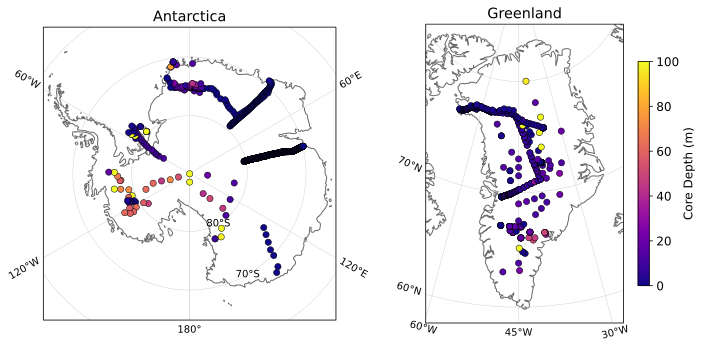

In [8]:
# Try uncommenting each of these to make different plots, or change the arguments to anything you'd like

# su.PlotLocs(df=dfPoints)
# su.PlotLocs(df=dfPoints, color_by='limegreen')
# su.PlotLocs(df=dfPoints, color_by=dfPoints['Method'], color_map='tab20b')
su.PlotLocs(df=dfPoints, color_by=dfPoints['Core Depth (m)'], color_map='plasma', vmin=0, vmax=100, save='yes')


## 7) Use `SavePoints` to save location data as `.csv` or `.kmz`

Provide a dataframe, the file type, and whether you'd like it separated into files by ice sheet.
*   `ftype`: choose `'csv'` or `'kmz'`
*   `by_icesheet`: choose `'yes'` or `'no'`

The output file(s) will be saved in the `output` folder. It can also be called on directly from the web version of [Google Earth](https://earth.google.com/web/). 



In [14]:
# Save a single kml file with both ice sheets included
su.SavePoints(df=dfPoints, ftype='kmz', by_icesheet='no')

## 8) Use `PlotDensity` to create a density profile figure

This function reads in the processed dataframe and given CoreID's and then plots density profiles.

At the minimum provide a dataframe a 1 to 6 CoreIDs: `su.PlotDensity(df=df, CoreID=[180,839,1294]`

Other optional arguments:
* `color`: Default color is `'m'` for a single plot, and `['m','c','k','y','r','b']` for a plot with multiple lines. Use brackets if you specify a color (e.g., `color=['red']`)
* `compare`: Default is `'no'`, but you can choose `'yes'` to show the profiles on the same plot rather than individual ones. Note that if you choose `'yes'`, all of the CoreID's should be from the same ice sheet
    * Antarctica: 0-886
    * Greenland: 887-1689
* `'save'`: Default is `'no'`. Choose `'yes'` to save the figure in the `figures` folder.

Note that many of the measurements in Antarctica are just one or two measurements of surface density so the plots are less interesting. Try plotting ones with CoreID's less than 26.

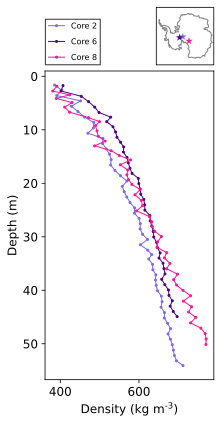

In [10]:
# Try uncommenting these to view density profiles and different ways to visualize them

# su.PlotDensity(df=dfData, CoreID=[1412])
# su.PlotDensity(df=dfData, CoreID=[1135], color=['b'], save='yes')
# su.PlotDensity(df=dfData, CoreID=[10,23,191,201], compare='yes', save='yes')
# su.PlotDensity(df=dfData, CoreID=[913,914,915], color=['slateblue'])
su.PlotDensity(df=dfData, CoreID=[2,6,8], color=['mediumslateblue','indigo','deeppink'], compare='yes')